<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/12/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

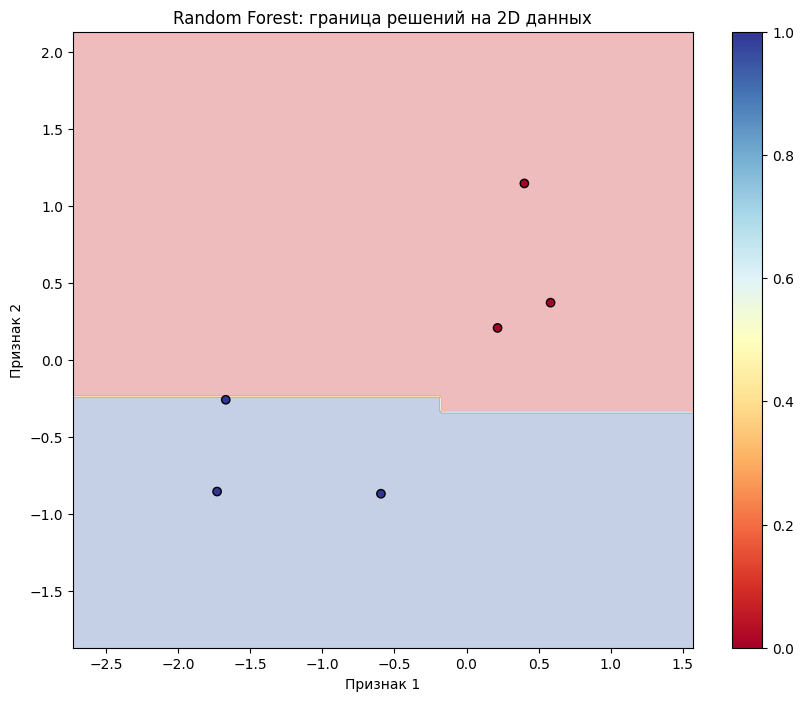

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Генерация 2D-данных
X, y = make_classification(
    n_samples=6,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=40
)

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Обучение модели
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# 4. Визуализация
plt.figure(figsize=(10, 8))

# Создание сетки для визуализации границы решений
h = 0.02  # шаг сетки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Предсказание на всей сетке
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Отображение границы решений
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Отображение точек
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.colorbar(scatter)

plt.title("Random Forest: граница решений на 2D данных")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

Точность модели: 0.98


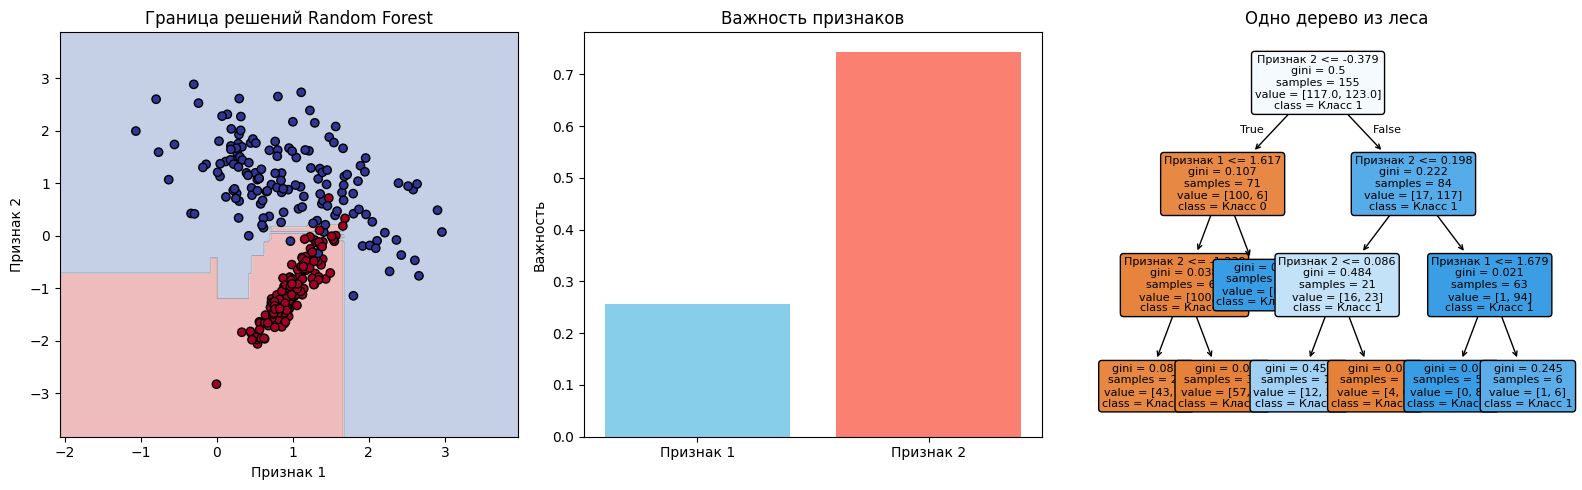

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# 1. Генерация двумерных данных
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Обучение случайного леса
rf = RandomForestClassifier(
    n_estimators=10,   # уменьшим до 10 для наглядности
    max_depth=3,       # ограничим глубину, чтобы дерево было читаемым
    random_state=42
)
rf.fit(X_train, y_train)

# 4. Оценка точности
accuracy = rf.score(X_test, y_test)
print(f"Точность модели: {accuracy:.2f}")

# 5. Визуализация 1: граница решений
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("Граница решений Random Forest")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# 6. Визуализация 2: важность признаков
plt.subplot(1, 3, 2)
importances = rf.feature_importances_
plt.bar(['Признак 1', 'Признак 2'], importances, color=['skyblue', 'salmon'])
plt.title("Важность признаков")
plt.ylabel("Важность")

# 7. Визуализация 3: одно дерево из леса
plt.subplot(1, 3, 3)
# Выбираем первое дерево
tree_to_plot = rf.estimators_[0]
plot_tree(
    tree_to_plot,
    feature_names=['Признак 1', 'Признак 2'],
    class_names=['Класс 0', 'Класс 1'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Одно дерево из леса")

plt.tight_layout()
plt.show()

In [ ]:
!pip install pillow

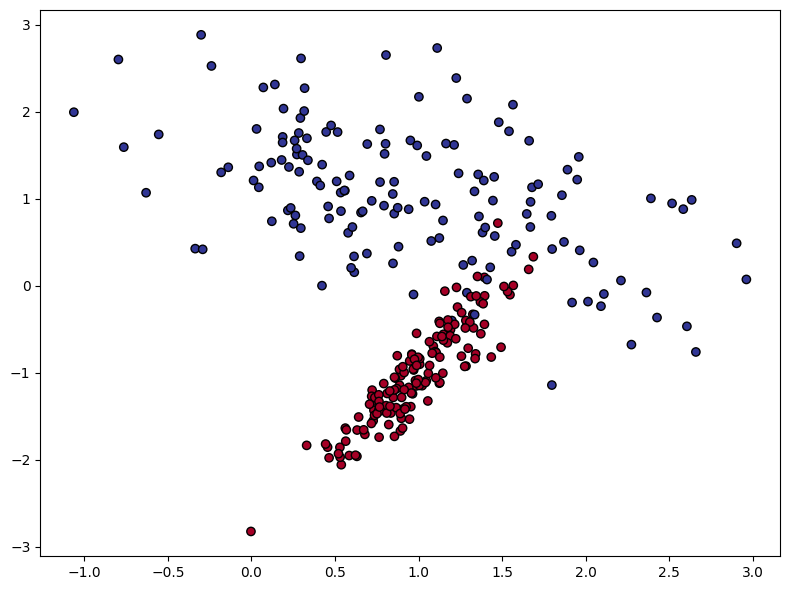

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 1. Генерация данных
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Параметры анимации
n_estimators_max = 50  # максимальное число деревьев
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Создаём модель, но не обучаем сразу
rf = RandomForestClassifier(
    n_estimators=1,
    max_depth=5,
    random_state=42,
    warm_start=True  # позволяет добавлять деревья инкрементально
)

# 3. Подготовка графика
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', zorder=3)
contour = [None]  # контейнер для контурного графика (mutable)

def animate(frame):
    # frame — номер кадра, начиная с 1
    n_trees = frame + 1  # первый кадр — 1 дерево

    # Устанавливаем число деревьев и обучаем (warm_start!)
    rf.set_params(n_estimators=n_trees)
    rf.fit(X, y)  # при warm_start обучение продолжается с предыдущего состояния

    # Предсказание на сетке
    Z = rf.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Очистка и отрисовка
    ax.clear()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu', zorder=1)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', zorder=2)
    ax.set_title(f"Random Forest: {n_trees} дерево(ьев)")
    ax.set_xlabel("Признак 1")
    ax.set_ylabel("Признак 2")

# 4. Запуск анимации
anim = FuncAnimation(
    fig, animate,
    frames=n_estimators_max,
    interval=300,     # пауза между кадрами в мс
    repeat=False,
    blit=False
)

plt.tight_layout()
plt.show()

# Добавь в конец (требуется imagemagick или pillow)
anim.save("random_forest_animation.gif", writer='pillow', fps=2)